<a href="https://colab.research.google.com/github/albinovik/non_opt_course/blob/main/%D0%98%D0%BD%D1%82%D0%B5%D1%80%D0%BF%D0%BE%D0%BB%D1%8F%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ИНТЕРПОЛЯЦИЯ.**
Интерполяцией называют такую разновидность аппроксимации, при которой кривая построенной функции проходит точно через имеющиеся точки данных. Аппроксимация же заключается в нахождении функции, которая максимально правдоподобно описывает набор данных, и линия графика проходит вблизи известных данных. Ниже график иллюстрирует аппрокимационную и интерполяционную кривые.

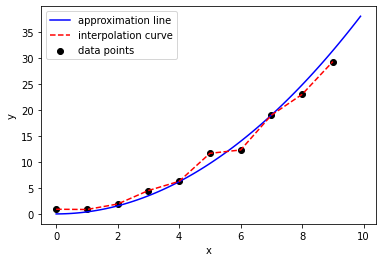

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#dataset
x_data = list(range(10))
y_data = [0.9, 0.85, 1.9, 4.5, 6.27, 11.65, 12.3, 19, 23, 29.31]

#definition of an user fucntion
def func2(x):
  if 0<=x<10:
    return 0.388 * x**2
x = np.linspace(0, 10, 100)
y = np.vectorize(func2)
plt.plot(x,y(x),'b-', label = 'approximation line')


plt.plot(x_data, y_data, 'r--', label = 'interpolation curve')


plt.scatter(x_data, y_data, c='black', label='data points')

plt.legend()

plt.xlabel('x')
plt.ylabel('y')
plt.show()

**Интерполяция явной функцией.** В простейшем случае интерполяцию можно осуществить, предположив наличие некоторой явной функции. В примере ниже даны три точки. Какой линией мы можем соединить все эти точки?

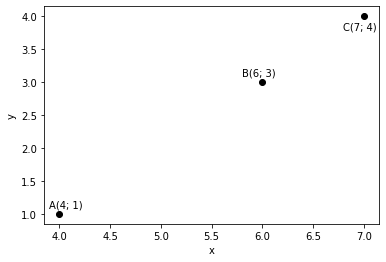

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_data = [4, 6, 7]
y_data = [1, 3, 4]

plt.annotate('A(4; 1)', xy = (3.9, 1.1))
plt.annotate('B(6; 3)', xy = (5.8, 3.1))
plt.annotate('C(7; 4)', xy = (6.8, 3.8))

plt.scatter(x_data, y_data, c='black', label='data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Прямая линия, судя по всему, должна успешно пройти через данные точки. Будем проводить интерполяция с помощью линии y = K * x + B. Поскольку это линия, то для её построения будет достаточно работы с двумя точками. Третья точка в конце расчетов либо ляжет на прямую, либо станет понятно, что расчет неверен.

Это приводит к решению системы уравнений:

7 * K + B = 4

4 * K + B = 1

Для построения были использованы точки C и A. В результате решения найдем: K = 1, B = -3. Соответственно, линия должна выглядеть так: y = x - 3.

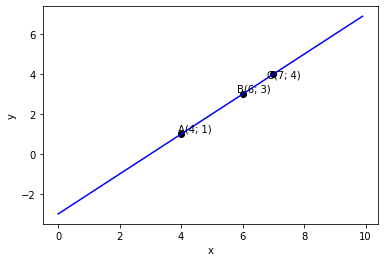

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x_data = [4, 6, 7]
y_data = [1, 3, 4]

plt.annotate('A(4; 1)', xy = (3.9, 1.1))
plt.annotate('B(6; 3)', xy = (5.8, 3.1))
plt.annotate('C(7; 4)', xy = (6.8, 3.8))

#definition of an user function
def func3(x):
  if 0<=x<10:
    return x - 3
x = np.linspace(0, 10, 100)
y = np.vectorize(func3)
plt.plot(x,y(x),'b-', label = 'approximation line')

plt.scatter(x_data, y_data, c='black', label='data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**Интерполяция параметрически заданной функцией.**

Понятно, что в более сложных случаях мы можем не угадать с кривой. А иногда нам, вообще, может понадобиться интерполяция параметрически заданной функцией. Рассмотрим снова три точки, как показано ниже:

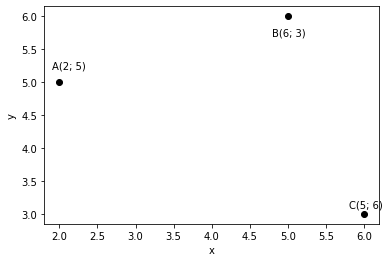

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_data = [2, 5, 6]
y_data = [5, 6, 3]

plt.annotate('A(2; 5)', xy = (1.9, 5.2))
plt.annotate('C(5; 6)', xy = (5.8, 3.1))
plt.annotate('B(6; 3)', xy = (4.8, 5.7))

plt.scatter(x_data, y_data, c='black', label='data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Параметрическая функция **p(t)**, которая строит интерполяционную кривую, может быть преставлена двумя полиномами:



$a10 + a11 t + a12 t^2$

$a20 + a21 t + a22 t^2$

Предполагая, что при подстановки t=0 полиномы возвращают координаты первой точки, при подстановки t=1/2 - координаты второй, а при подстановки t=1 - координаты третей, мы сможем найти коэффициенты полиномов. Перечисленные выше предположения можно сформулировать следующим образом:

p(0) = A, p($\frac{1}{2}$) = B, p(1) = C 

Получается, что интерполяция происходит на интервале [0, 1] для параметра t.

Подставим наши предположения для параметра t в первый полином:

a10 = A

a10 + a11 $\frac{1}{2}$ + a12 $\frac{1}{4}$ = В

a10 + a11 +a12 = C

Для упрощения можно взять только координаты на оси x точек A, B, C:

a10 = xA

a10 + a11 $\frac{1}{2}$ + a12 $\frac{1}{4}$ = xВ

a10 + a11 +a12 = xC

Фактически здесь записано уравнение для матриц и реализовано матричное умножение матрицы коэффициентов первого полинома

In [2]:
import sympy as sym

t, a10, a11, a12 = sym.symbols('t a10 a11 a12')

M1 = sym.Matrix([[a10], [a11],[a12]])
M1

Matrix([
[a10],
[a11],
[a12]])

и некоторой числовой матрицы:

In [3]:
M2 = sym.Matrix([[1, 0, 0], [1, 0.5, 0.25],[1, 1, 1]])
M2

Matrix([
[1,   0,    0],
[1, 0.5, 0.25],
[1,   1,    1]])

Это легко проверить матричным умножением:

In [ ]:
M2*M1

Matrix([
[                     a10],
[a10 + 0.5*a11 + 0.25*a12],
[         a10 + a11 + a12]])

Тогда, чтобы получить матрицу интерполяции (в данном случае, квадратичной интерполяции), нужно взять обратную матрицу от M2 и перемножить её на координаты точек.

Найдем обратную матрицу для M:

In [4]:
M3 = M2.inv()
M3

Matrix([
[   1,    0,    0],
[-3.0,  4.0, -1.0],
[ 2.0, -4.0,  2.0]])

Теперь найдем коэффициенты первого полинома:

In [6]:
# the x coordinates matrix of A,B,C points
Mx = sym.Matrix([[2], [5],[6]])

#matrixes multiplicatin
M3*Mx

Matrix([
[   2],
[ 8.0],
[-4.0]])

In [7]:
# the y coordinates matrix of A,B,C points
My = sym.Matrix([[5], [6],[3]])

#matrixes multiplicatin
M3*My

Matrix([
[   5],
[ 6.0],
[-8.0]])

Таким образом, результатом является функция **p(t)**, полиномы которой выглядят следующим образом:

$2 + 8 t - 4 t^2$

$5 + 6 t - 8 t^2$

Проиллюстрируем решение на графике:

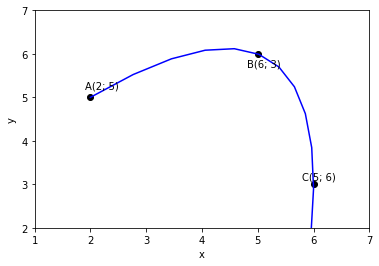

In [8]:
import numpy as np
import matplotlib.pyplot as plt

x_data = [2, 5, 6]
y_data = [5, 6, 3]

plt.annotate('A(2; 5)', xy = (1.9, 5.2))
plt.annotate('C(5; 6)', xy = (5.8, 3.1))
plt.annotate('B(6; 3)', xy = (4.8, 5.7))

t=np.linspace(0,10,100)
x=2 + 8 * t - 4 * t**2
y=5 + 6 * t - 8 * t**2
plt.plot(x, y, 'b-')# b- red colour and unbroken line

plt.scatter(x_data, y_data, c='black', label='data')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([1, 7])#range for x
plt.ylim([2, 7])#range for y
plt.show()

**Интерполяция средствами Python.**

Специализированные методы для построения интерполяционных кривых могут быть найдены в библиотеке scipy.

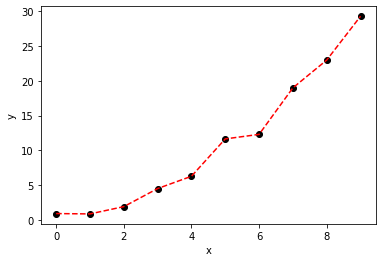

In [10]:
import numpy as np
import matplotlib.pyplot as plt

#dataset
x_data = list(range(10))
y_data = [0.9, 0.85, 1.9, 4.5, 6.27, 11.65, 12.3, 19, 23, 29.31]


from scipy import interpolate
f=interpolate.interp1d(x_data,y_data, kind = 'quadratic')
#f=interpolate.interp1d(x_data,y_data, kind = 'cubic')

ynew=f(x_data)
plt.plot(x_data,ynew, 'r--')


plt.scatter(x_data, y_data, c='black', label='data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()